In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
cancerDeMama = pd.read_csv("data.csv")
cancerDeMama = cancerDeMama.drop(['id', 'Unnamed: 32'], axis=1)
mean_feats = np.concatenate([['diagnosis'], cancerDeMama.iloc[:,1:11].columns.tolist()])
error_feats = np.concatenate([['diagnosis'], cancerDeMama.iloc[:,11:21].columns.tolist()])
worst_feats = np.concatenate([['diagnosis'], cancerDeMama.iloc[:,21:31].columns.tolist()])


In [ ]:
cancerDeMama.shape

(569, 31)

In [ ]:
cancerDeMama.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
cancerDeMama.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [ ]:
cancerDeMama.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
cancerDeMama.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


Text(0.5, 1.0, 'Matriz de correlacion')

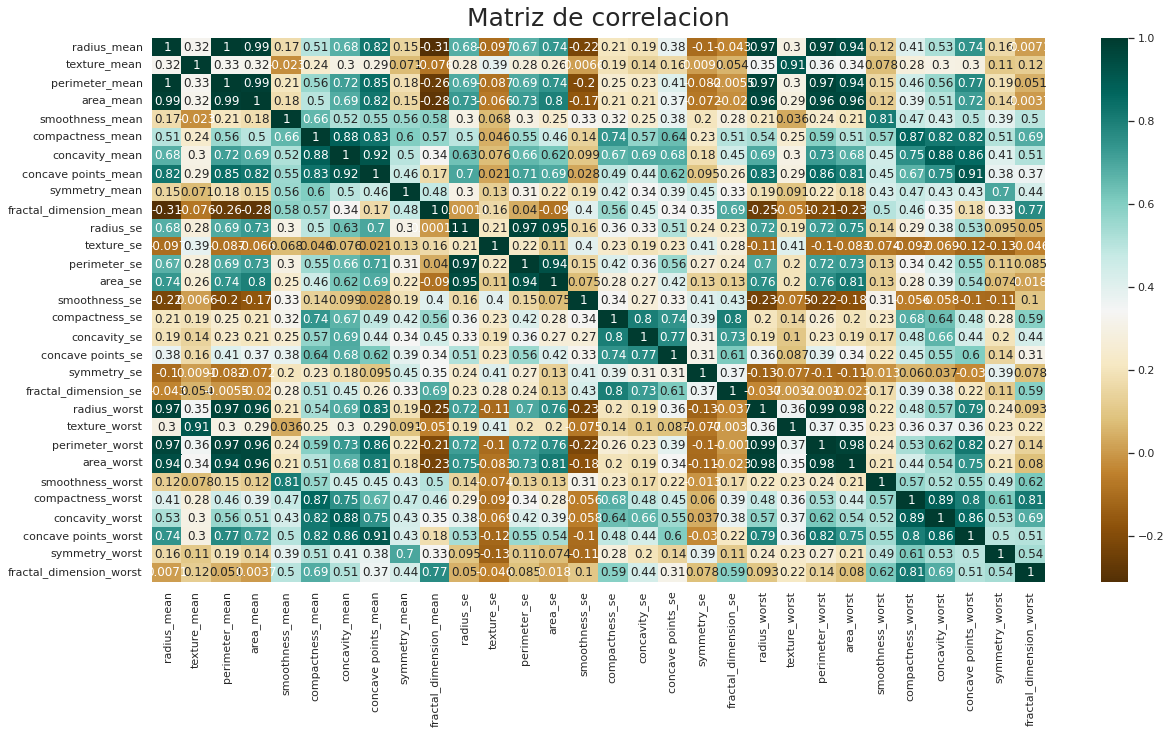

In [ ]:
plt.figure(figsize = (20, 10))
heatmap = sns.heatmap(cancerDeMama.corr(), cmap='BrBG', annot=True)
heatmap.set_title('Matriz de correlacion', fontdict={'fontsize': 25}, pad=12)

In [ ]:
cancerDeMama.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

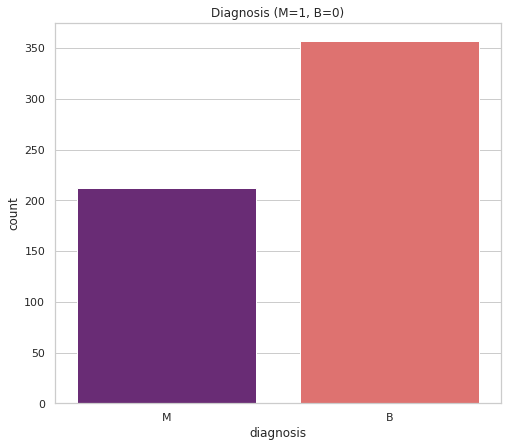

In [ ]:
plt.figure(figsize= (8,7))
sns.countplot(x = 'diagnosis', data=cancerDeMama, palette='magma' )
plt.title('Diagnosis (M=1, B=0)')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

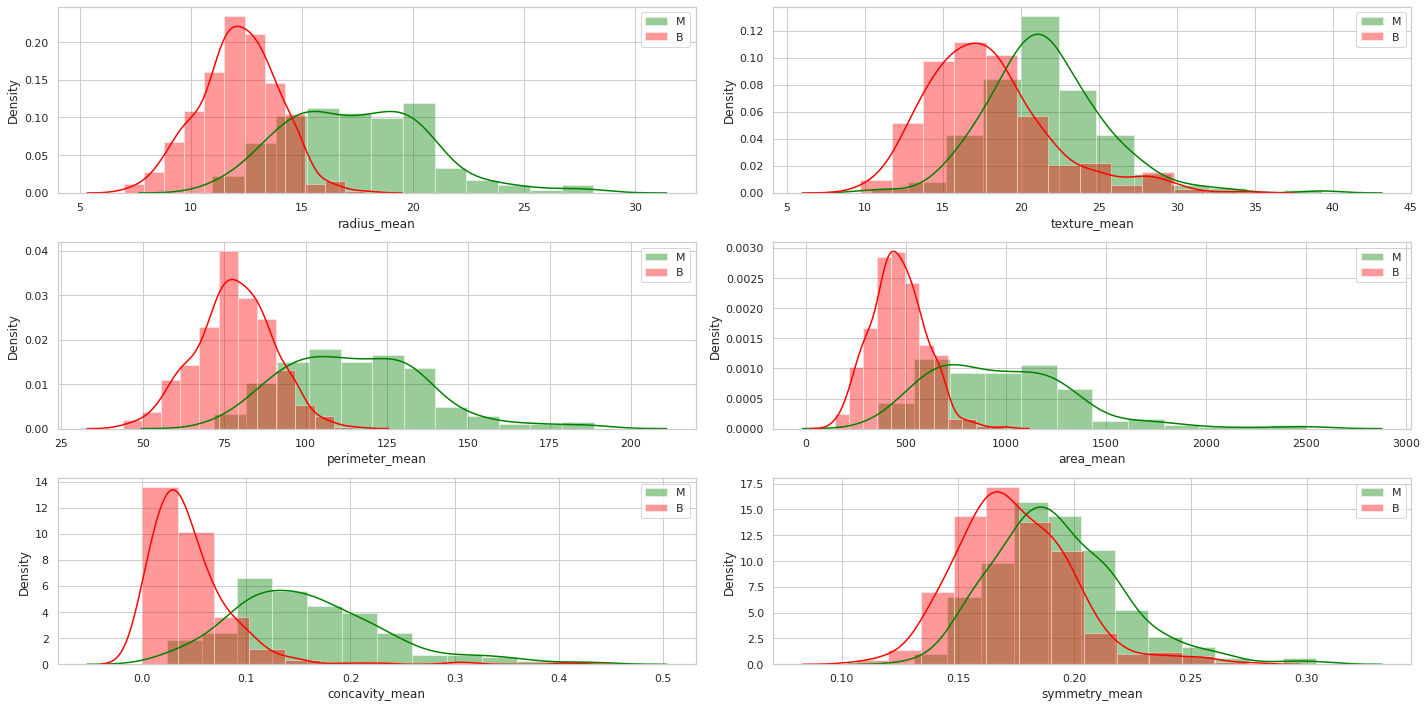

In [ ]:
bins = 12
fig, axes = plt.subplots(2,3, figsize = (20, 10))

plt.subplot(3,2,1)
sns.distplot(cancerDeMama[cancerDeMama['diagnosis'] == 'M']['radius_mean'], bins= bins , color='green', label='M')
sns.distplot(cancerDeMama[cancerDeMama['diagnosis'] == 'B']['radius_mean'], bins= bins , color='red', label='B')
plt.legend(loc = 'upper right')

plt.subplot(3,2,2)
sns.distplot(cancerDeMama[cancerDeMama['diagnosis'] == 'M']['texture_mean'], bins= bins , color='green', label='M')
sns.distplot(cancerDeMama[cancerDeMama['diagnosis'] == 'B']['texture_mean'], bins= bins , color='red', label='B')
plt.legend(loc = 'upper right')

plt.subplot(3,2,3)
sns.distplot(cancerDeMama[cancerDeMama['diagnosis'] == 'M']['perimeter_mean'], bins= bins , color='green', label='M')
sns.distplot(cancerDeMama[cancerDeMama['diagnosis'] == 'B']['perimeter_mean'], bins= bins , color='red', label='B')
plt.legend(loc = 'upper right')

plt.subplot(3,2,4)
sns.distplot(cancerDeMama[cancerDeMama['diagnosis'] == 'M']['area_mean'], bins= bins , color='green', label='M')
sns.distplot(cancerDeMama[cancerDeMama['diagnosis'] == 'B']['area_mean'], bins= bins , color='red', label='B')
plt.legend(loc = 'upper right')

plt.subplot(3,2,5)
sns.distplot(cancerDeMama[cancerDeMama['diagnosis'] == 'M']['concavity_mean'], bins= bins , color='green', label='M')
sns.distplot(cancerDeMama[cancerDeMama['diagnosis'] == 'B']['concavity_mean'], bins= bins , color='red', label='B')
plt.legend(loc = 'upper right')

plt.subplot(3,2,6)
sns.distplot(cancerDeMama[cancerDeMama['diagnosis'] == 'M']['symmetry_mean'], bins= bins , color='green', label='M')
sns.distplot(cancerDeMama[cancerDeMama['diagnosis'] == 'B']['symmetry_mean'], bins= bins , color='red', label='B')
plt.legend(loc = 'upper right')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

cancerDeMama['diagnosis'] = le.fit_transform(cancerDeMama['diagnosis'])

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(cancerDeMama)

scaled_data = scaler.transform(cancerDeMama)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(scaled_data)

x_pca = pca.fit_transform(scaled_data)

In [ ]:
scaled_data.shape, x_pca.shape

((569, 31), (569, 2))

In [ ]:
pca_df = pd.DataFrame(data = x_pca, columns = ['principal component 1', 'principal component 2'])
pca_df

,principal component 1,principal component 2
0,9.225770,2.116196
1,2.655802,-3.784776
2,5.892492,-1.005579
3,7.135401,10.318716
4,4.129423,-1.905579
...,...,...
564,6.593983,-3.454947
565,4.024833,-3.556006
566,1.530077,-1.958871
567,10.405008,1.849078


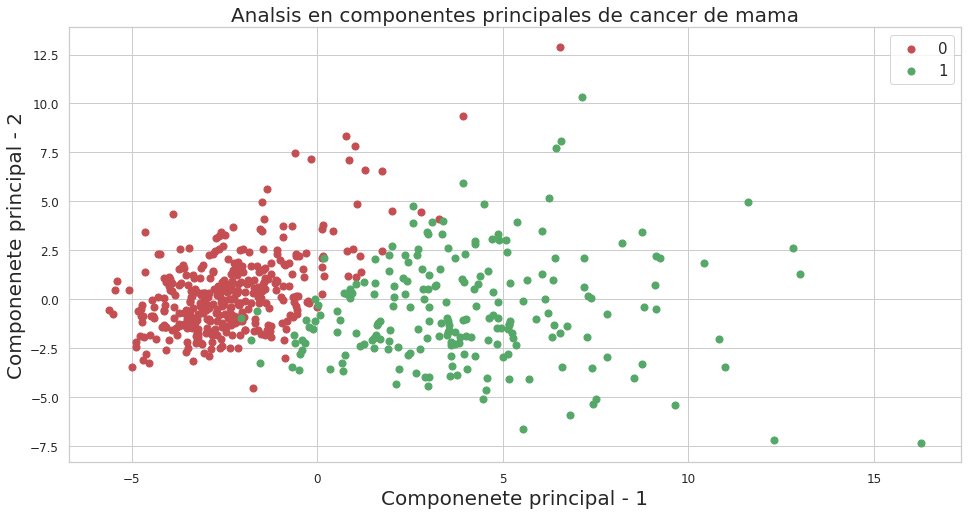

In [ ]:
plt.figure(figsize = (16,8))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.xlabel('Componenete principal - 1', fontsize=20)
plt.ylabel('Componenete principal - 2', fontsize=20)

plt.title('Analsis en componentes principales de cancer de mama', fontsize=20)
#TODO : 0 Benigno y 1 Maligno
targets = [0,1]
colors = ['r', 'g']

for target, color in zip(targets, colors):
  indicesToKeep = cancerDeMama['diagnosis'] == target
  plt.scatter(pca_df.loc[indicesToKeep, 'principal component 1'], pca_df.loc[indicesToKeep, 'principal component 2'], c = color, s=50)

plt.legend(targets, prop={'size': 15})

In [ ]:
X = cancerDeMama.drop('diagnosis', axis=1)
Y = cancerDeMama['diagnosis']

In [ ]:
len(X.columns)

30

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(cancerDeMama, test_size=0.2,
                               stratify=cancerDeMama['diagnosis'], random_state=42) 


In [ ]:
train_diag = train.diagnosis.value_counts() / train.shape[0]
train_diag.rename('Train', inplace=True)
test_diag = test.diagnosis.value_counts() / test.shape[0]
test_diag.rename('Test', inplace=True)

pd.concat([train_diag, test_diag], axis=1)

,Train,Test
0,0.626374,0.631579
1,0.373626,0.368421


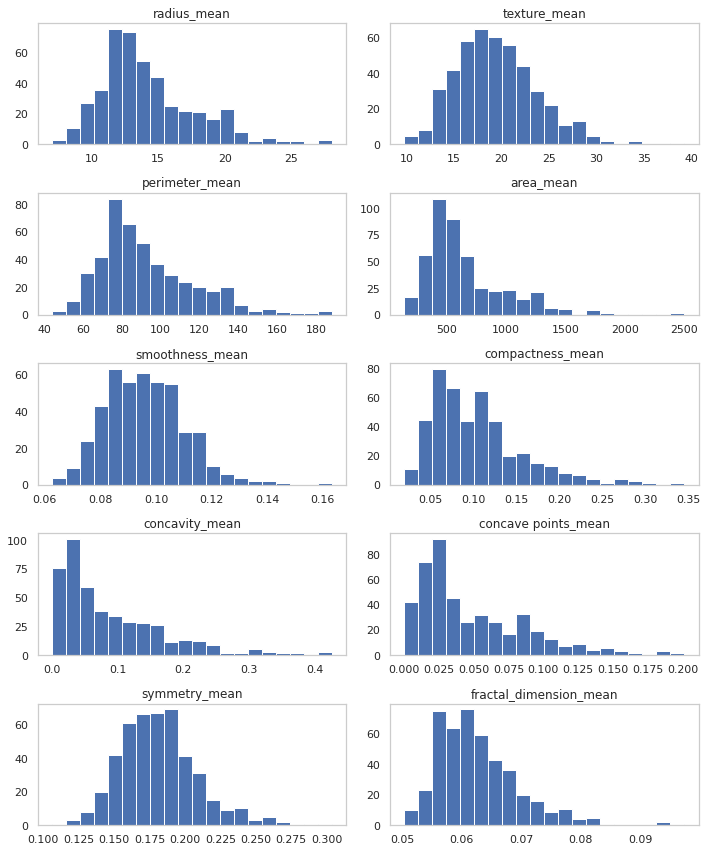

In [ ]:
train.iloc[:,1:11].hist(figsize=(10,12), bins=20, layout=(5,2), grid=False)
plt.tight_layout();

In [ ]:
sns.set(style='whitegrid', font_scale=1.35, rc={'axes.grid': False})



p = sns.pairplot(train[mean_feats], hue='diagnosis',
             plot_kws={'alpha':0.6}, palette='magma')

plt.subplots_adjust(hspace=0.05, wspace=0.05)
handles = p._legend_data.values()
labels = p._legend_data.keys()
p.fig.legend(handles=handles, labels=labels, loc='upper center', ncol=2)
p.fig.set_dpi(80);



Output hidden; open in https://colab.research.google.com to view.

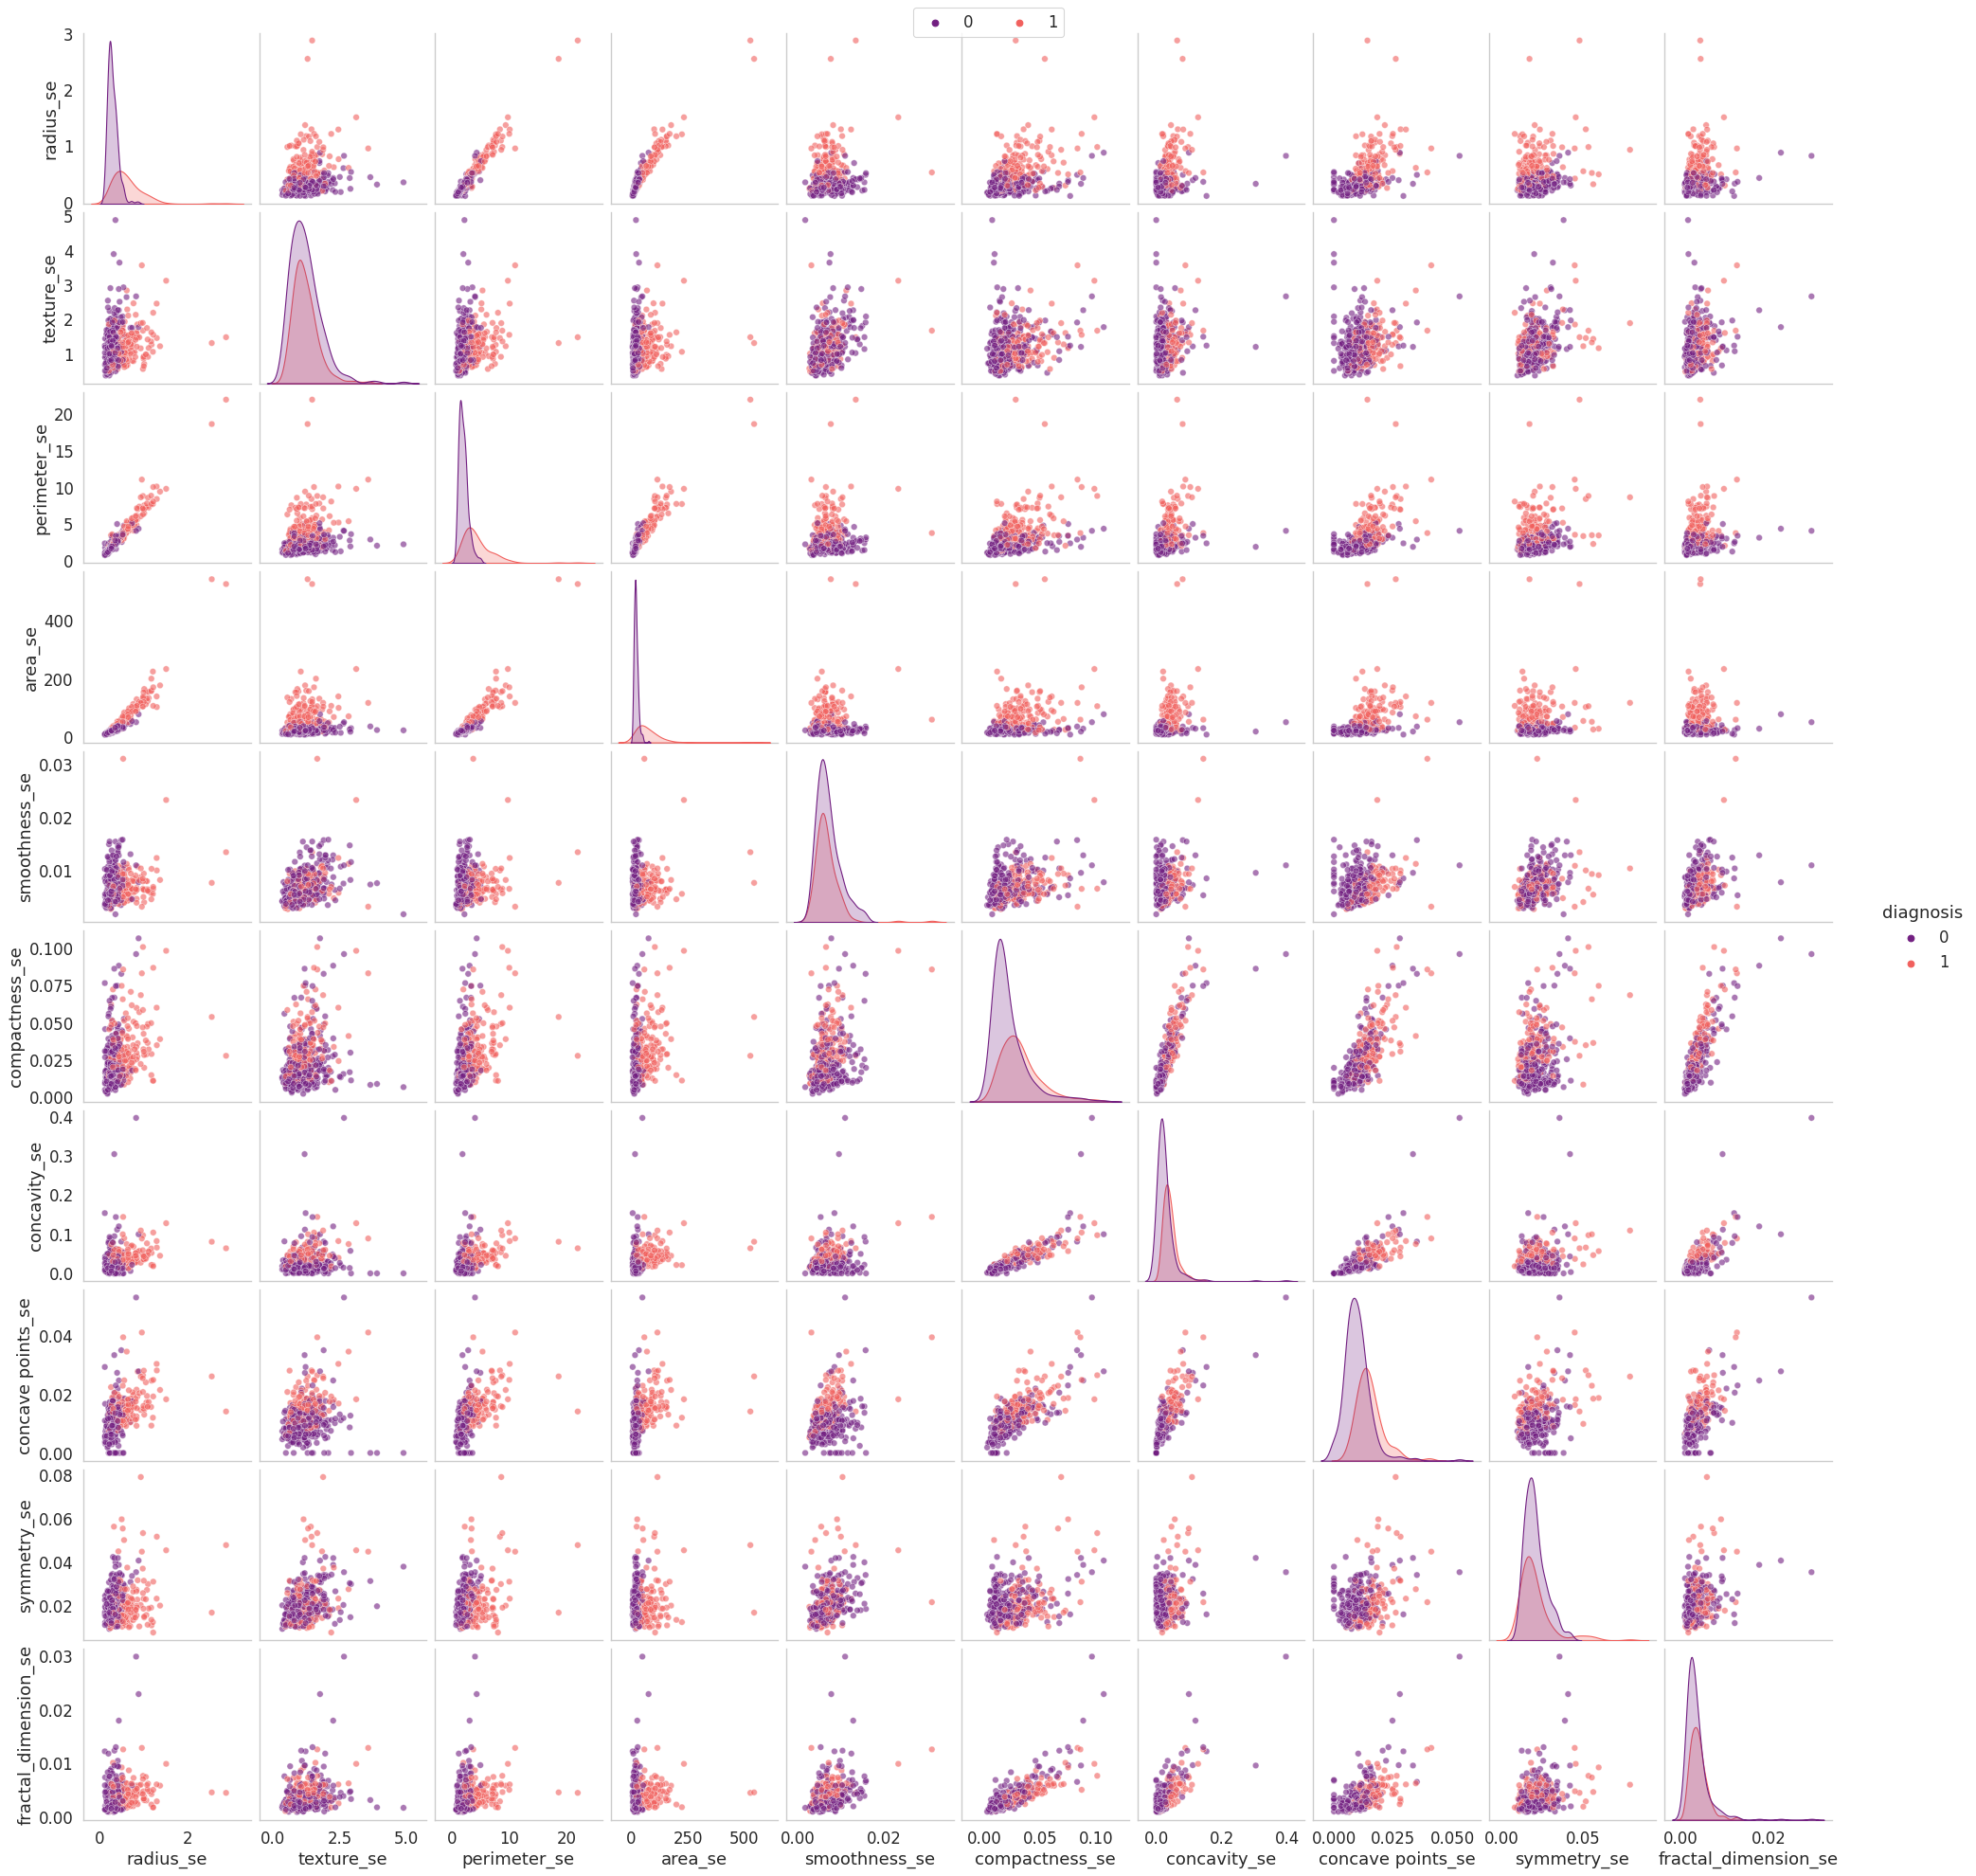

In [ ]:
p = sns.pairplot(train[error_feats], hue='diagnosis',
             plot_kws={'alpha':0.6, }, palette='magma')

plt.subplots_adjust(hspace=0.05, wspace=0.05)
handles = p._legend_data.values()
labels = p._legend_data.keys()
p.fig.legend(handles=handles, labels=labels, loc='upper center', ncol=2)
p.fig.set_dpi(80);


In [ ]:
p = sns.pairplot(train[worst_feats], hue='diagnosis',
                 plot_kws={'alpha':0.6}, palette='magma')

plt.subplots_adjust(hspace=0.05, wspace=0.05)
handles = p._legend_data.values()
labels = p._legend_data.keys()
p.fig.legend(handles=handles, labels=labels, loc='upper center', ncol=2)
p.fig.set_dpi(80);


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
def feat_class(feat):
    if 'worst' in feat:
        return 'Worst'
    elif 'mean' in feat:
        return 'Mean'
    elif 'se' in feat:
        return 'Standard Error'

sns.set(style='whitegrid')


corrs = train.corr()[['diagnosis']].sort_values('diagnosis',
                                             ascending=False)[1:].reset_index()
corrs.rename(columns={'index':'Features'}, inplace=True)
corrs['Class'] = corrs['Features'].apply(feat_class)
corrs['Main'] = corrs['Features'].apply(lambda x: x.split('_')[0])

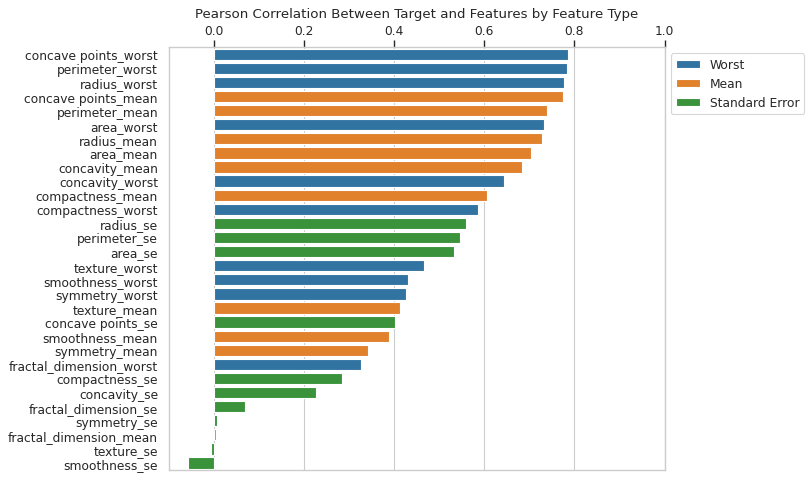

In [ ]:
fig, ax = plt.subplots(figsize=(8,7), dpi=80)
sns.barplot(data=corrs, x='diagnosis', y='Features', ax=ax,
            hue='Class', dodge=False, palette='tab10')
ax.legend(bbox_to_anchor=(1.0, 1.0), loc=2)
ax.xaxis.tick_top()
ax.xaxis.label.set_visible(False)
ax.set_xlim(-0.1, 1.0)
ax.yaxis.label.set_visible(False)
ax.set_title('Pearson Correlation Between Target and Features by Feature Type');

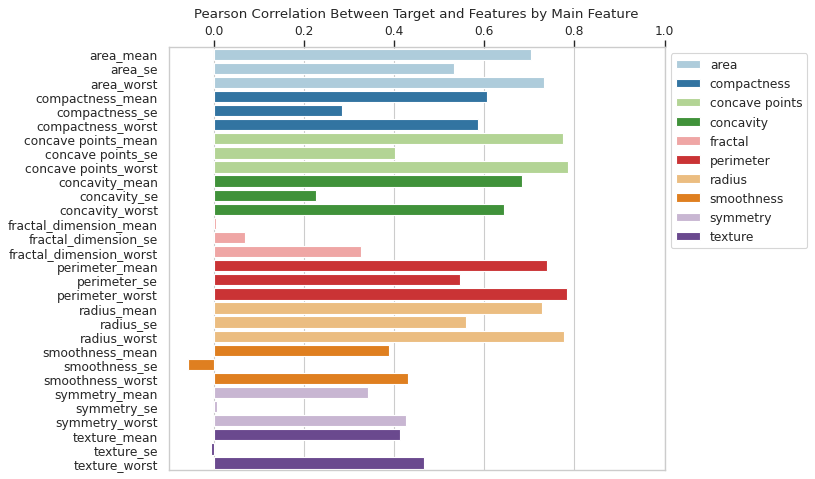

In [ ]:
plot_ord = corrs.sort_values('Features')['Features']
hue_ord = corrs.sort_values('Main')['Main'].unique()

fig, ax = plt.subplots(figsize=(8,7), dpi=80)
sns.barplot(data=corrs, x='diagnosis', y='Features', ax=ax, order=plot_ord,
            hue='Main', hue_order=hue_ord, dodge=False, palette='Paired')
ax.legend(bbox_to_anchor=(1.0, 1.0), loc=2)
ax.xaxis.tick_top()
ax.xaxis.label.set_visible(False)
ax.yaxis.label.set_visible(False)
ax.set_xlim(-0.1, 1.0)
ax.set_title('Pearson Correlation Between Target and Features by Main Feature');

In [ ]:
# Importing Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from xgboost import XGBClassifier

# Importing other tools
from sklearn.metrics import confusion_matrix, classification_report, make_scorer
from sklearn.metrics import accuracy_score, recall_score, precision_recall_curve
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.calibration import CalibratedClassifierCV


# Defining random seed
seed=42

# Creating Models
logreg = LogisticRegression(solver='lbfgs', random_state=seed)
lda = LinearDiscriminantAnalysis()
svc = SVC(random_state=seed, probability=True)
lin_svc = LinearSVC(random_state=seed)
l_svc = CalibratedClassifierCV(lin_svc, cv=5)
dtree = DecisionTreeClassifier(random_state=seed)
rf = RandomForestClassifier(10, random_state=seed)
gdb = GradientBoostingClassifier(random_state=seed)
adb = AdaBoostClassifier(random_state=seed)
xgb = XGBClassifier(random_state=seed)
knn = KNeighborsClassifier()

first_models = [logreg, lda, svc, l_svc,
                dtree, rf, gdb, adb, xgb, knn]
first_model_names = ['Logistic Regression', 'LDA', 'SVC', 'Linear SVC',
                    'Decision Tree', 'Random Forest', 'GradientBoosting',
                    'AdaBoost', 'XGB', 'K-Neighbors'] 

# Defining other steps
n_folds = 5
skf = StratifiedKFold(n_splits=n_folds, random_state=seed, shuffle=True)
std_sca = StandardScaler()


X_train = train.drop(['diagnosis'] ,axis=1)
y_train = train['diagnosis']


train_size = X_train.shape[0]
n_models = len(first_models)
oof_pred = np.zeros((train_size, n_models))
scores = []

for n, model in enumerate(first_models):
    model_pipeline = Pipeline(steps=[('Scaler', std_sca),
                                     ('Estimator', model)])
    accuracy = np.zeros(n_folds)
    recall = np.zeros(n_folds)
    
    for i, (train_ix, val_ix) in enumerate(skf.split(X_train, y_train)):
        x_tr,  y_tr  = X_train.iloc[train_ix], y_train.iloc[train_ix]
        x_val, y_val = X_train.iloc[val_ix],   y_train.iloc[val_ix]
        
        model_pipeline.fit(x_tr, y_tr)
        val_pred = model_pipeline.predict(x_val)
        
        oof_pred[val_ix, n] = model_pipeline.predict_proba(x_val)[:,1]
        
        fold_acc = accuracy_score(y_val, val_pred)
        fold_rec = recall_score(y_val, val_pred)
        
        accuracy[i] = fold_acc
        recall[i] = fold_rec
    
    scores.append({'Accuracy'          : accuracy.mean(),
                   'Recall'            : recall.mean()})


In [ ]:
measure_cols = ['Accuracy', 'Recall']#, 'Accuracy Std.Dev.', 'Recall Std.Dev.']

first_scores = pd.DataFrame(columns=measure_cols)

for name, score in zip(first_model_names, scores):
    
    new_row = pd.Series(data=score, name=name)
    first_scores = first_scores.append(new_row)
    
first_scores = first_scores.sort_values('Recall', ascending=False)
first_scores

,Accuracy,Recall
Logistic Regression,0.973626,0.952941
GradientBoosting,0.967033,0.947059
XGB,0.967033,0.947059
SVC,0.971429,0.947059
Linear SVC,0.969231,0.929412
AdaBoost,0.960440,0.923529
K-Neighbors,0.964835,0.917647
Random Forest,0.951648,0.905882
Decision Tree,0.923077,0.894118
LDA,0.956044,0.888235


In [ ]:
feature_names = X_train.columns
feat_imp_df = pd.DataFrame(columns=first_model_names, index=feature_names)

# Dropping the Models that don't have feature importances for this analysis
feat_imp_df.drop(['SVC', 'Linear SVC', 'K-Neighbors'], axis=1, inplace=True)

# I'm using absolute values for logistic Regression and LDA because we only care about the magnitude of the coefficient, not its direction 
feat_imp_df['Logistic Regression'] = np.abs(logreg.coef_.ravel())
feat_imp_df['LDA'] = np.abs(lda.coef_.ravel())
feat_imp_df['Decision Tree'] = dtree.feature_importances_
feat_imp_df['Random Forest'] = rf.feature_importances_
feat_imp_df['GradientBoosting'] = gdb.feature_importances_
feat_imp_df['AdaBoost'] = adb.feature_importances_
feat_imp_df['XGB'] = xgb.feature_importances_

In [ ]:
feat_imp_df.head(3)

,Logistic Regression,LDA,Decision Tree,Random Forest,GradientBoosting,AdaBoost,XGB
radius_mean,0.307286,14.440086,0.000000,0.065739,0.000051,0.0,0.008114
texture_mean,0.493714,0.340545,0.049299,0.007919,0.041071,0.1,0.021895
perimeter_mean,0.297284,19.202712,0.000000,0.063405,0.000055,0.0,0.000000


In [ ]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

scaled_fi = pd.DataFrame(data=mms.fit_transform(feat_imp_df),
                         columns=feat_imp_df.columns,
                         index=feat_imp_df.index)
scaled_fi['Overall'] = scaled_fi.sum(axis=1)

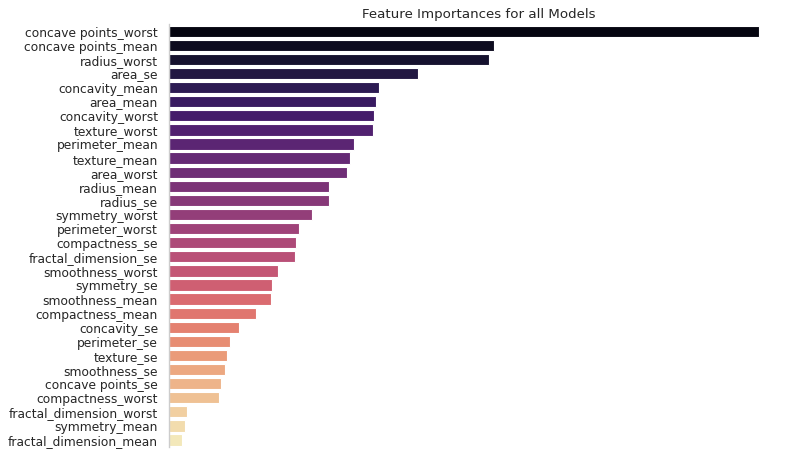

In [ ]:
ordered_ranking = scaled_fi.sort_values('Overall', ascending=False)
fig, ax = plt.subplots(figsize=(10,7), dpi=80)
sns.barplot(data=ordered_ranking, y=ordered_ranking.index, x='Overall', palette='magma')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.xaxis.set_visible(False)
ax.grid(False)
ax.set_title('Feature Importances for all Models');

In [ ]:
train_v2 = train.drop(ordered_ranking.index[:-6:-1], axis=1)
test_v2 = test.drop(ordered_ranking.index[:-6:-1], axis=1)

X_train_v2 = train_v2.drop(['diagnosis'] ,axis=1)
X_test_v2 = test_v2.drop(['diagnosis'] ,axis=1)

In [ ]:
train_size = X_train_v2.shape[0]
test_size = test.shape[0]
n_models = len(first_models)
oof_pred = np.zeros((train_size, n_models))
scores = []

for n, model in enumerate(first_models):
    model_pipeline = Pipeline(steps=[('Scaler', std_sca),
                                     ('Estimator', model)])
    accuracy = np.zeros(n_folds)
    recall = np.zeros(n_folds)
    
    for i, (train_ix, val_ix) in enumerate(skf.split(X_train_v2, y_train)):
        x_tr,  y_tr  = X_train_v2.iloc[train_ix], y_train.iloc[train_ix]
        x_val, y_val = X_train_v2.iloc[val_ix],   y_train.iloc[val_ix]
        
        model_pipeline.fit(x_tr, y_tr)
        val_pred = model_pipeline.predict(x_val)
        
        oof_pred[val_ix, n] = model_pipeline.predict_proba(x_val)[:,1]
        
        fold_acc = accuracy_score(y_val, val_pred)
        fold_rec = recall_score(y_val, val_pred)
        
        accuracy[i] = fold_acc
        recall[i] = fold_rec
    
    scores.append({'Accuracy'          : accuracy.mean(),
                   'Recall'            : recall.mean()})

In [ ]:


measure_cols = ['Accuracy', 'Recall']

fs_scores = pd.DataFrame(columns=measure_cols)

for name, score in zip(first_model_names, scores):
    
    new_row = pd.Series(data=score, name=name)
    fs_scores = fs_scores.append(new_row)
    
fs_scores = fs_scores.sort_values('Recall', ascending=False)



d={'First Scores':first_scores, 'Less Features':fs_scores}
pd.concat(d, axis=1, sort=False)



First Scores           Less Features          
                        Accuracy    Recall      Accuracy    Recall
Logistic Regression     0.973626  0.952941      0.975824  0.958824
GradientBoosting        0.967033  0.947059      0.967033  0.941176
XGB                     0.967033  0.947059      0.969231  0.952941
SVC                     0.971429  0.947059      0.969231  0.941176
Linear SVC              0.969231  0.929412      0.967033  0.929412
AdaBoost                0.960440  0.923529      0.964835  0.947059
K-Neighbors             0.964835  0.917647      0.971429  0.929412
Random Forest           0.951648  0.905882      0.960440  0.929412
Decision Tree           0.923077  0.894118      0.927473  0.911765
LDA                     0.956044  0.888235      0.951648  0.876471

In [ ]:
oof_dataframe = pd.DataFrame(data=oof_pred, columns=first_model_names, index=train.index)
oof_dataframe['diagnosis'] = train['diagnosis']
oof_dataframe = oof_dataframe.drop(['LDA', 'Decision Tree', 'Linear SVC'], axis=1)


In [ ]:
def all_wrong(x):
    predictions = sum(x[:7])
    target = x[7]
    if (target == 1 and predictions == 0) or \
       (target == 0 and predictions == 7):
        return True
    
    else: return False

In [ ]:
oof_dataframe['All_wrong'] = round(oof_dataframe).apply(all_wrong, axis=1)
oof_dataframe.query("All_wrong == True")

,Logistic Regression,SVC,Random Forest,GradientBoosting,AdaBoost,XGB,K-Neighbors,diagnosis,All_wrong
297,0.002806,0.006707,0.1,0.000461,0.239906,0.007979,0.0,1,True
40,0.108951,0.118963,0.0,0.002913,0.426269,0.043976,0.2,1,True
135,0.203676,0.077619,0.0,0.001030,0.449553,0.040263,0.0,1,True


In [ ]:
# We have 7 models + our target so the perfect scores would be 0 and 1
# I am also adding to the Easy Ones group cases that only one model disagrees with the rest
oof_dataframe['Easy_one'] = round(oof_dataframe).sum(axis=1).isin([0, 1, 7, 8])

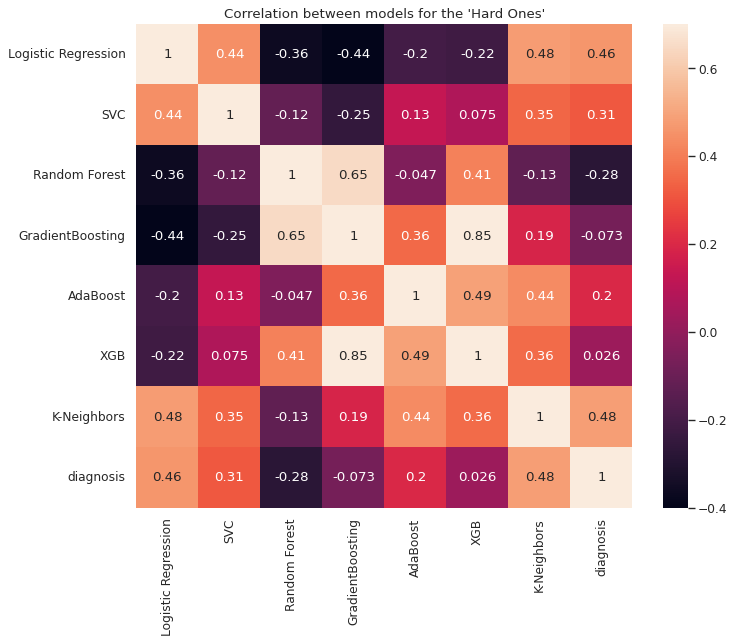

In [ ]:
# We define our Hard_ones dataset by filtering easy_ones out
hard_ones = oof_dataframe.query("Easy_one == False and \
    All_wrong == False").drop(['Easy_one', 'All_wrong'], axis=1)

plt.figure(figsize=(10,8), dpi=80)
sns.heatmap(hard_ones.corr(),
            vmin=-0.4, vmax=0.7, annot=True)
plt.title("Correlation between models for the 'Hard Ones'");

In [ ]:
from sklearn.model_selection import GridSearchCV

# Defining this function to make our lives easier on tuning
def train_gridsearch(model, x=X_train_v2, y=y_train, name=None):
    t_model = model
    t_model.fit(x, y)
    print(30*'-')
    if name != None: print(name)
    print('\nBest Parameters:')
    for item in t_model.best_params_.items():
        print(item[0], ': ', item[1])
    print('\nScore: ', t_model.best_score_, '\n')
    print(30*'-')

from sklearn.base import BaseEstimator, TransformerMixin

class Logger(BaseEstimator, TransformerMixin):
    def __init__(self, apply_log = True):
        self.apply_log = apply_log
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        logX = X.copy()
        
        if self.apply_log:
            logX = np.log1p(X)
            return logX
    
        else: return X

logger = Logger()

In [ ]:
# Logistic Regression Initial Parameters
log_pams = [{'M__solver':['liblinear'],
             'M__class_weight':[None, 'balanced'],
             'M__C': [0.001, 0.01, 0.1, 1, 10, ],
             'M__penalty':['l1'], 
             'L__apply_log':[False]},
            {'M__solver':['lbfgs'],
             'M__class_weight':[None, 'balanced'],
             'M__C': [0.001, 0.01, 0.1, 1, 10, ],
             'M__penalty':['l2'], 
             'L__apply_log':[False]}]

# It is important to apply the log transformer before the scaling otherwise we will always get 'number near 0' error.
log_pipe = Pipeline(steps=[('L', logger),
                           ('S', std_sca),
                           ('M', logreg)])

log_gs = GridSearchCV(log_pipe, log_pams, scoring='recall',
                      cv=skf, n_jobs=-1, refit=True)

train_gridsearch(log_gs)

------------------------------

Best Parameters:
L__apply_log :  False
M__C :  0.1
M__class_weight :  balanced
M__penalty :  l1
M__solver :  liblinear

Score:  0.9647058823529411 

------------------------------


In [ ]:
# Logistic Regression Initial Parameters
log_pams = [{'M__solver':['liblinear'],
             'M__class_weight':['balanced'],
             'M__C': [0.5, 0.75, 1, 1.25, 1.5],
             'M__penalty':['l1'], 
             'L__apply_log':[False]}]

# It is important to apply the log transformer before the scaling otherwise we will always get 'number near 0' error.
log_pipe = Pipeline(steps=[('L', logger),
                           ('S', std_sca),
                           ('M', logreg)])

log_gs = GridSearchCV(log_pipe, log_pams, scoring='recall',
                      cv=skf, n_jobs=-1, refit=True)

train_gridsearch(log_gs)


------------------------------

Best Parameters:
L__apply_log :  False
M__C :  0.5
M__class_weight :  balanced
M__penalty :  l1
M__solver :  liblinear

Score:  0.9588235294117646 

------------------------------


In [ ]:
logreg_tuned = log_gs.best_estimator_

In [ ]:
# SVC Initial Parameters
svc_pams = [{'M__kernel':['rbf'],
             'M__class_weight':[None, 'balanced'],
             'M__C': [0.001, 0.01, 0.1, 1, 10, 100, 200],
             'M__gamma':['auto', 'scale', 0.001, 0.01, 0.1],
             'L__apply_log':[True, False]}]

# It is important to apply the log transformer before the scaling otherwise we will always get 'number near 0' error.
svc_pipe = Pipeline(steps=[('L', logger),
                           ('S', std_sca),
                           ('M', svc)])

svc_gs = GridSearchCV(svc_pipe, svc_pams, scoring='recall',
                      cv=skf, n_jobs=-1, refit=True)

train_gridsearch(svc_gs)

------------------------------

Best Parameters:
L__apply_log :  True
M__C :  0.1
M__class_weight :  balanced
M__gamma :  0.1
M__kernel :  rbf

Score:  0.9764705882352942 

------------------------------


In [ ]:
# SVC Second Parameters
svc_pams = [{'M__kernel':['rbf'],
             'M__class_weight':[None, 'balanced'],
             'M__C': [5, 7.5, 10, 12.5, 15],
             'M__gamma':[0.005, 0.01, 0.015],
             'L__apply_log':[True, False]}]

# It is important to apply the log transformer before the scaling otherwise we will always get 'number near 0' error.
svc_pipe = Pipeline(steps=[('L', logger),
                           ('S', std_sca),
                           ('M', svc)])

svc_gs = GridSearchCV(svc_pipe, svc_pams, scoring='f1',
                      cv=skf, n_jobs=-1,
                      refit=True)

train_gridsearch(svc_gs)



------------------------------

Best Parameters:
L__apply_log :  False
M__C :  12.5
M__class_weight :  None
M__gamma :  0.015
M__kernel :  rbf

Score:  0.9760181778496853 

------------------------------


In [ ]:
print(30*'-')
print('Confusion Matrix:')
print(confusion_matrix(y_train, svc_gs.predict(X_train_v2)))
print('\nCV Recall Score:')
print(cross_validate(svc_gs, X_train_v2, y_train,
                     scoring='recall', cv=skf)['test_score'].mean())
print(30*'-')

------------------------------
Confusion Matrix:
[[285   0]
 [  5 165]]

CV Recall Score:
0.9470588235294117
------------------------------


In [ ]:
svc_tuned = svc_gs.best_estimator_

In [ ]:
# GradientBoosting Second round Parameters
gdb_pams = {'M__max_depth':[3],
            'M__min_samples_leaf':[2],
            'M__max_features': [0.9, 0.95],
            'M__learning_rate':[0.05, 0.1, 0.15],
            'M__n_estimators':[60, 80],
            'M__subsample':[0.8, 0.9, 1.0],
            'L__apply_log':[False]}

# It is important to apply the log transformer before the scaling otherwise we will always get 'number near 0' error.
gdb_pipe = Pipeline(steps=[('L', logger),
                           ('S', std_sca),
                           ('M', gdb)])

gdb_gs = GridSearchCV(gdb_pipe, gdb_pams, scoring='recall',
                      cv=skf, n_jobs=-1, refit=True)

train_gridsearch(gdb_gs)

gdb_tuned = gdb_gs.best_estimator_

------------------------------

Best Parameters:
L__apply_log :  False
M__learning_rate :  0.1
M__max_depth :  3
M__max_features :  0.9
M__min_samples_leaf :  2
M__n_estimators :  80
M__subsample :  0.8

Score:  0.9588235294117646 

------------------------------


In [ ]:
# Random Forest Second round Parameters
rf_pams = {'M__max_depth':[None],
           'M__min_samples_leaf':[1, 2],
           'M__max_features': [0.8, 0.9, 0.95],
           'M__n_estimators':[8, 10, 12],
           'M__class_weight':['balanced'],
           'L__apply_log':[False, True]}

# It is important to apply the log transformer before the scaling
rf_pipe = Pipeline(steps=[('L', logger),
                          ('S', std_sca),
                          ('M', rf)])

rf_gs = GridSearchCV(rf_pipe, rf_pams, scoring='recall',
                     cv=skf, n_jobs=-1)

train_gridsearch(rf_gs)

------------------------------

Best Parameters:
L__apply_log :  False
M__class_weight :  balanced
M__max_depth :  None
M__max_features :  0.9
M__min_samples_leaf :  2
M__n_estimators :  12

Score:  0.9470588235294117 

------------------------------


In [ ]:
rf_tuned = rf_gs.best_estimator_

In [ ]:
knn_pams = {'M__n_neighbors':np.arange(2, 16),
            'M__weights':['uniform', 'distance'],
            'M__p':[1, 2, 3],
            'L__apply_log':[False, True]}

# It is important to apply the log transformer before the scaling
knn_pipe = Pipeline(steps=[('L', logger),
                           ('S', std_sca),
                           ('M', knn)])

knn_gs = GridSearchCV(knn_pipe, knn_pams, scoring='recall',
                      cv=skf, n_jobs=-1)

train_gridsearch(knn_gs)

------------------------------

Best Parameters:
L__apply_log :  True
M__n_neighbors :  6
M__p :  1
M__weights :  distance

Score:  0.9470588235294117 

------------------------------


In [ ]:
knn_tuned = knn_gs.best_estimator_

In [ ]:
from sklearn.model_selection import cross_val_predict

tuned_models = [logreg_tuned, svc_tuned,
                gdb_tuned, rf_tuned, knn_tuned]
tuned_names = ['Logistic Regression', 'SVC', 'GradientBoosting', 'RandomForest', 'KNNeighbors']

In [ ]:
tuned_oof_pred = np.zeros(shape=(train_size, 5)) # 5 models

for i, model in enumerate(tuned_models):
    tuned_oof_pred[:,i] = cross_val_predict(model, X_train_v2,
                                            method='predict_proba',
                                            y=y_train,
                                            cv=skf)[:,1]

tuned_train_pred = pd.DataFrame(data=tuned_oof_pred, 
                            index=X_train_v2.index, 
                            columns=tuned_names)

In [ ]:
tuned_test_pred = np.zeros(shape=(test_size, 5)) # 5 models

for i, model in enumerate(tuned_models):
    
    model.fit(X_train_v2, y_train)
    tuned_test_pred[:,i] = model.predict_proba(X_test_v2)[:,1]

tuned_test_pred = pd.DataFrame(data=tuned_test_pred, 
                            index=X_test_v2.index, 
                            columns=tuned_names)

In [ ]:
X_train_scaled = std_sca.fit_transform(X_train_v2)
X_test_scaled = std_sca.transform(X_test_v2)

X_train_final = np.concatenate([X_train_scaled, tuned_train_pred], axis=1)
X_test_final = np.concatenate([X_test_scaled, tuned_test_pred], axis=1)

In [ ]:
# Logistic Regression Initial Parameters
log_pams = [{'solver':['liblinear'],
             'class_weight':[None, 'balanced'],
             'C': [0.001, 0.01, 0.1, 1, 10],
             'penalty':['l1']},
            {'solver':['lbfgs'],
             'class_weight':[None, 'balanced'],
             'C': [0.001, 0.01, 0.1, 1, 10],
             'penalty':['l2']}]

# It is important to apply the log transformer before the scaling otherwise we will always get 'number near 0' error.
log_lvl2 = LogisticRegression(random_state=seed)

log_lvl2_gs = GridSearchCV(log_lvl2, log_pams, scoring='recall',
                           cv=skf, n_jobs=-1)

train_gridsearch(log_lvl2_gs, x=X_train_final, y=y_train)

log_snd_lvl = log_lvl2_gs.best_estimator_

------------------------------

Best Parameters:
C :  0.1
class_weight :  balanced
penalty :  l1
solver :  liblinear

Score:  0.9647058823529411 

------------------------------


In [ ]:
# Logistic Regression Second Round Parameters
log_pams = {'solver':['liblinear'],
            'class_weight':[None],
            'C': [0.005, 0.01, 0.015, 0.02],
            'penalty':['l1']}

# It is important to apply the log transformer before the scaling otherwise we will always get 'number near 0' error.
log_lvl2 = LogisticRegression(random_state=seed)

log_lvl2_gs = GridSearchCV(log_lvl2, log_pams, scoring='recall',
                           cv=skf, n_jobs=-1)

train_gridsearch(log_lvl2_gs, x=X_train_final, y=y_train)

log_snd_lvl = log_lvl2_gs.best_estimator_

------------------------------

Best Parameters:
C :  0.015
class_weight :  None
penalty :  l1
solver :  liblinear

Score:  0.9588235294117646 

------------------------------


In [ ]:
test_predictions = round(tuned_test_pred)
y_test = test['diagnosis']

In [ ]:
def confusion_plot(y_true, pred, ax, name):
    ax.xaxis.set_ticks_position('top')
    sns.heatmap(confusion_matrix(y_test, pred),
                ax=ax, annot=True, square=True, cbar=False,
                fmt='.0f', cmap='BuGn_r', vmax=10)
    ax.set_title(f'{name}\n\nPredicted')
    ax.set_xlabel(f'Accuracy:  {100*accuracy_score(y_test, pred):.4}% \
    \nRecall: {100*recall_score(y_test, pred):.4}%')
    ax.xaxis.set_label_position('bottom')
    ax.xaxis.label.set_fontsize(11)

    for tik in ax.get_xticklines():
        tik.set_visible(False)
    for tk in ax.get_yticklabels():
        tk.set_visible(False)

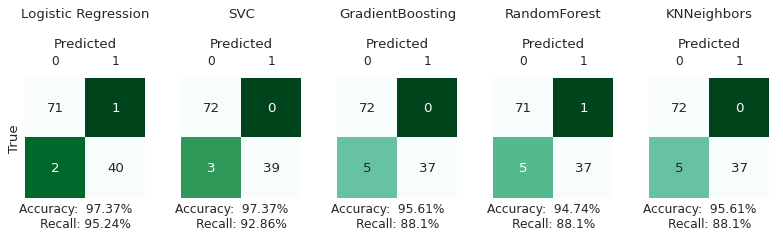

In [ ]:
fig, axes = plt.subplots(1,5, figsize=(12,5), dpi=80)
fig.subplots_adjust(wspace=0.3)

for name, col, ax in zip(tuned_names, tuned_test_pred.columns, axes):
    pred = np.round(tuned_test_pred[col])
    confusion_plot(y_test, pred, ax, name)

for tick in axes[0].get_yticklabels():
    tick.set_visible(True)

axes[0].set_ylabel('True');

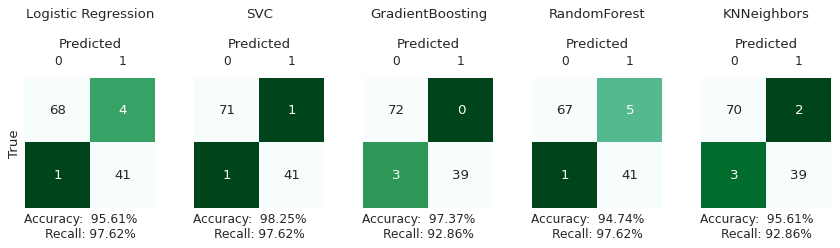

In [ ]:
fig, axes = plt.subplots(1,5, figsize=(13,6), dpi=80)
fig.subplots_adjust(wspace=0.3)

for name, col, ax in zip(tuned_names, tuned_test_pred.columns, axes):
    pred = tuned_test_pred[col].apply(lambda x: 1 if x>=0.25 else 0)
    confusion_plot(y_test, pred, ax, name)

for tick in axes[0].get_yticklabels():
    tick.set_visible(True)

axes[0].set_ylabel('True');

In [ ]:
log_snd_lvl.fit(X_train_final, y_train)
second_lvl_pred = pd.Series(log_snd_lvl.predict_proba(X_test_final)[:,1])

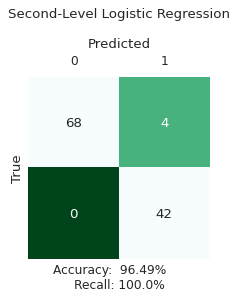

In [ ]:
fig, ax = plt.subplots(figsize=(5,3), dpi=80)
confusion_plot(y_test, np.round(second_lvl_pred), ax, 'Second-Level Logistic Regression')
for tick in ax.get_yticklabels():
    tick.set_visible(True)
ax.set_ylabel('True');

In [ ]:
# import pickle
import joblib
# joblib.dump()
# print('Model score:', model.score(X_test_scaled, y_test))
joblib.dump(log_snd_lvl, open('cancerDetectionStakingModel_joblib', 'wb'))
joblib.dump(logreg_tuned[1:3], open('logreg_tuned_joblib', 'wb'),  compress=1)
joblib.dump(std_sca, open('std_sca_joblib', 'wb'),  compress=1)
joblib.dump(svc_tuned[1:3], open('svc_tuned_joblib', 'wb'),  compress=1)
joblib.dump(gdb_tuned[1:3], open('gdb_tuned_joblib', 'wb'),  compress=1)
joblib.dump(rf_tuned[1:3], open('rf_tuned_joblib', 'wb'),  compress=1)
joblib.dump(knn_tuned[1:3], open('knn_tuned_joblib', 'wb'),  compress=1)

for x in X_test_v2.iloc:
  print(x)


test_v2


radius_mean              11.410000
texture_mean             10.820000
perimeter_mean           73.340000
area_mean               403.300000
smoothness_mean           0.093730
compactness_mean          0.066850
concavity_mean            0.035120
concave points_mean       0.026230
radius_se                 0.140800
texture_se                0.460700
perimeter_se              1.103000
area_se                  10.500000
smoothness_se             0.006040
compactness_se            0.015290
concavity_se              0.015140
symmetry_se               0.013440
fractal_dimension_se      0.002206
radius_worst             12.820000
texture_worst            15.970000
perimeter_worst          83.740000
area_worst              510.500000
smoothness_worst          0.154800
concavity_worst           0.210200
concave points_worst      0.089580
symmetry_worst            0.301600
Name: 120, dtype: float64
radius_mean               20.940000
texture_mean              23.560000
perimeter_mean           13

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,radius_se,...,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,concavity_worst,concave points_worst,symmetry_worst
120,0,11.41,10.82,73.34,403.3,0.09373,0.06685,0.03512,0.02623,0.1408,...,0.01344,0.002206,12.82,15.97,83.74,510.5,0.1548,0.21020,0.08958,0.3016
250,1,20.94,23.56,138.90,1364.0,0.10070,0.16060,0.27120,0.13100,1.0040,...,0.02401,0.005002,25.58,27.00,165.30,2010.0,0.1211,0.69910,0.21050,0.3126
375,0,16.17,16.07,106.30,788.5,0.09880,0.14380,0.06651,0.05397,0.1745,...,0.01934,0.003696,16.97,19.14,113.10,861.5,0.1235,0.21140,0.12510,0.3153
99,1,14.42,19.77,94.48,642.5,0.09752,0.11410,0.09388,0.05839,0.2895,...,0.01462,0.004452,16.33,30.86,109.50,826.4,0.1431,0.31940,0.15650,0.2718
455,0,13.38,30.72,86.34,557.2,0.09245,0.07426,0.02819,0.03264,0.3408,...,0.01564,0.002985,15.05,41.61,96.69,705.6,0.1172,0.07003,0.07763,0.2196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,0,11.04,14.93,70.67,372.7,0.07987,0.07079,0.03546,0.02074,0.1642,...,0.01880,0.001941,12.09,20.83,79.73,447.1,0.1095,0.15530,0.06754,0.3202
534,0,10.96,17.62,70.79,365.6,0.09687,0.09752,0.05263,0.02788,0.1507,...,0.01322,0.003534,11.62,26.51,76.43,407.5,0.1428,0.21230,0.09861,0.2289
448,0,14.53,19.34,94.25,659.7,0.08388,0.07800,0.08817,0.02925,0.2535,...,0.01394,0.002327,16.30,28.39,108.10,830.5,0.1089,0.37790,0.09594,0.2471
205,1,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.2711,...,0.01523,0.002881,17.77,20.24,117.70,989.5,0.1491,0.33270,0.12520,0.3415
